# Titan Stock predictions using regression

In [1]:
#Importing necessary library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# importing datasets

In [2]:
db1=pd.read_csv(r"C:\Users\vasan\Downloads\Quote-Equity-TITAN-EQ-04-02-2021-to-04-02-2023.csv",parse_dates=['Date '],index_col=['Date '])
db1.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-02-03,EQ,"2,320.10","2,470.00","2,320.10","2,308.10","2,458.30","2,463.10","2,425.35","2,791.00","1,825.05",3693638,"8,958,363,285.70",205942
2023-02-02,EQ,"2,341.05","2,385.00","2,269.60","2,345.90","2,325.00","2,308.10","2,336.44","2,791.00","1,825.05",1788381,"4,178,441,160.95",114317
2023-02-01,EQ,"2,408.55","2,409.80","2,300.05","2,377.15","2,345.00","2,345.90","2,363.36","2,791.00","1,825.05",1521514,"3,595,890,169.10",103902
2023-01-31,EQ,"2,347.00","2,386.45","2,335.65","2,335.55","2,383.00","2,377.15","2,367.90","2,791.00","1,825.05",1252600,"2,966,030,261.25",90793
2023-01-30,EQ,"2,332.00","2,342.85","2,287.05","2,331.25","2,340.00","2,335.55","2,315.79","2,791.00","1,825.05",1401847,"3,246,381,011.10",120736


In [53]:
db2=pd.read_csv(r"C:\Users\vasan\Downloads\Quote-Equity-TITAN-EQ-04-02-2019-to-04-02-2021.csv",parse_dates=['Date '],index_col=['Date '])
db2.head()


,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2021-02-04,EQ,"1,530.00","1,540.00","1,488.10","1,525.15","1,511.95","1,513.60","1,507.87","1,621.35",720.9,2728965,"4,114,924,472.35",79930
2021-02-03,EQ,"1,492.00","1,529.00","1,492.00","1,485.45","1,520.10","1,525.15","1,518.24","1,621.35",720.9,1853072,"2,813,415,047.10",66399
2021-02-02,EQ,"1,515.00","1,536.00","1,482.00","1,501.55","1,488.00","1,485.45","1,504.37","1,621.35",720.9,1974202,"2,969,930,201.00",65640
2021-02-01,EQ,"1,437.80","1,508.55","1,423.65","1,420.30","1,505.75","1,501.55","1,469.39","1,621.35",720.9,2215933,"3,256,060,141.60",74312
2021-01-29,EQ,"1,456.00","1,469.25","1,415.25","1,450.10","1,422.00","1,420.30","1,439.44","1,621.35",720.9,2435997,"3,506,475,243.70",62294


In [52]:
db2.columns

Index(['series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ',
       'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades '],
      dtype='object')

In [4]:
db3=pd.read_csv(r"C:\Users\vasan\Downloads\Quote-Equity-TITAN-EQ-04-02-2018-to-04-02-2019.csv",parse_dates=['Date '],index_col=['Date '])
db3.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2019-02-04,EQ,"1,025.00","1,050.00","1,009.05",991.55,"1,024.50","1,025.75","1,032.34","1,050.00",732.3,9556052,"9,865,132,637.60",230113
2019-02-01,EQ,"1,003.00","1,005.00",985.10,995.80,991.80,991.55,991.67,"1,005.00",732.3,3424938,"3,396,415,408.95",88182
2019-01-31,EQ,968.20,"1,000.00",966.50,968.90,"1,000.00",995.80,986.14,"1,000.00",732.3,2306391,"2,274,435,354.85",69982
2019-01-30,EQ,966.10,974.95,960.05,966.10,964.55,968.90,967.76,999.70,732.3,1468812,"1,421,453,859.20",50380
2019-01-29,EQ,955.20,970.00,945.00,958.65,966.30,966.10,962.53,999.70,732.3,1411027,"1,358,155,357.10",53060


In [5]:
db1.shape,db2.shape,db3.shape #checking the shape of the dataset 

((497, 13), (471, 13), (247, 13))

In [6]:
db1.isnull().sum(),db2.isnull().sum(),db3.isnull().sum() #checking for null values in dataset

(series           0
 OPEN             0
 HIGH             0
 LOW              0
 PREV. CLOSE      0
 ltp              0
 close            0
 vwap             0
 52W H            0
 52W L            0
 VOLUME           0
 VALUE            0
 No of trades     0
 dtype: int64,
 series           0
 OPEN             0
 HIGH             0
 LOW              0
 PREV. CLOSE      0
 ltp              0
 close            0
 vwap             0
 52W H            0
 52W L            0
 VOLUME           0
 VALUE            0
 No of trades     0
 dtype: int64,
 series           0
 OPEN             0
 HIGH             0
 LOW              0
 PREV. CLOSE      0
 ltp              0
 close            0
 vwap             0
 52W H            0
 52W L            0
 VOLUME           0
 VALUE            0
 No of trades     0
 dtype: int64)

In [7]:
db=pd.concat([db1,db2,db3]) #joning three tables 
db

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2023-02-03,EQ,"2,320.10","2,470.00","2,320.10","2,308.10","2,458.30","2,463.10","2,425.35","2,791.00","1,825.05",3693638,"8,958,363,285.70",205942
2023-02-02,EQ,"2,341.05","2,385.00","2,269.60","2,345.90","2,325.00","2,308.10","2,336.44","2,791.00","1,825.05",1788381,"4,178,441,160.95",114317
2023-02-01,EQ,"2,408.55","2,409.80","2,300.05","2,377.15","2,345.00","2,345.90","2,363.36","2,791.00","1,825.05",1521514,"3,595,890,169.10",103902
2023-01-31,EQ,"2,347.00","2,386.45","2,335.65","2,335.55","2,383.00","2,377.15","2,367.90","2,791.00","1,825.05",1252600,"2,966,030,261.25",90793
2023-01-30,EQ,"2,332.00","2,342.85","2,287.05","2,331.25","2,340.00","2,335.55","2,315.79","2,791.00","1,825.05",1401847,"3,246,381,011.10",120736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09,EQ,790.10,804.00,783.05,800.75,796.05,796.80,796.06,938.50,383.15,1564899,"1,245,747,232.90",43947
2018-02-08,EQ,785.10,808.90,780.80,783.65,800.80,800.75,795.94,938.50,383.15,2219546,"1,766,626,655.70",70462
2018-02-07,EQ,785.00,801.00,780.00,782.65,784.00,783.65,791.39,938.50,383.15,2686877,"2,126,363,479.40",79600


In [8]:
db.shape #checking shape after joining 


(1215, 13)

In [9]:
db.isnull().sum() ##checking for null values  after joining

series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [10]:
db.describe() #understanding dataset using descibre()

,VOLUME,No of trades
count,1.215000e+03,1215.000000
mean,2.318868e+06,82822.887243
std,1.794731e+06,46078.996177
min,1.815060e+05,10139.000000
25%,1.227330e+06,54639.500000
50%,1.859258e+06,71139.000000
75%,2.829072e+06,96742.000000
max,2.214359e+07,536406.000000


In [11]:
db.dtypes # checking datatypes of dataset

series           object
OPEN             object
HIGH             object
LOW              object
PREV. CLOSE      object
ltp              object
close            object
vwap             object
52W H            object
52W L            object
VOLUME            int64
VALUE            object
No of trades      int64
dtype: object

In [12]:
db.info() #observing the information of dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215 entries, 2023-02-03 to 2018-02-05
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   series         1215 non-null   object
 1   OPEN           1215 non-null   object
 2   HIGH           1215 non-null   object
 3   LOW            1215 non-null   object
 4   PREV. CLOSE    1215 non-null   object
 5   ltp            1215 non-null   object
 6   close          1215 non-null   object
 7   vwap           1215 non-null   object
 8   52W H          1215 non-null   object
 9   52W L          1215 non-null   object
 10  VOLUME         1215 non-null   int64 
 11  VALUE          1215 non-null   object
 12  No of trades   1215 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 132.9+ KB


In [13]:
# renaming columns 
cols=['Series','Open','High','Low','Previous_close','last_traded_price','Close','Vwap','52wh','52wl','Volume','Value','Nooftraders']

In [14]:
db.columns=cols

In [15]:
#dropping columns from the dataset
db.drop(['Series','Nooftraders','52wh','52wl','Previous_close'],axis=1,inplace=True)

In [16]:
#checking for any null values 
db.isnull().sum()

Open                 0
High                 0
Low                  0
last_traded_price    0
Close                0
Vwap                 0
Volume               0
Value                0
dtype: int64

In [17]:
# replacing object datatypes as float 
db['Open']=db['Open'].str.replace(',','').astype(float)
db['High']=db['High'].str.replace(',','').astype(float)
db['Low']=db['Low'].str.replace(',','').astype(float)
db['last_traded_price']=db['last_traded_price'].str.replace(',','').astype(float)
db['Close']=db['Close'].str.replace(',','').astype(float)
db['Vwap']=db['Vwap'].str.replace(',','').astype(float)
db['Value']=db['Value'].str.replace(',','').astype(float)


In [18]:
db.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215 entries, 2023-02-03 to 2018-02-05
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1215 non-null   float64
 1   High               1215 non-null   float64
 2   Low                1215 non-null   float64
 3   last_traded_price  1215 non-null   float64
 4   Close              1215 non-null   float64
 5   Vwap               1215 non-null   float64
 6   Volume             1215 non-null   int64  
 7   Value              1215 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 85.4 KB


<AxesSubplot:xlabel='Date '>

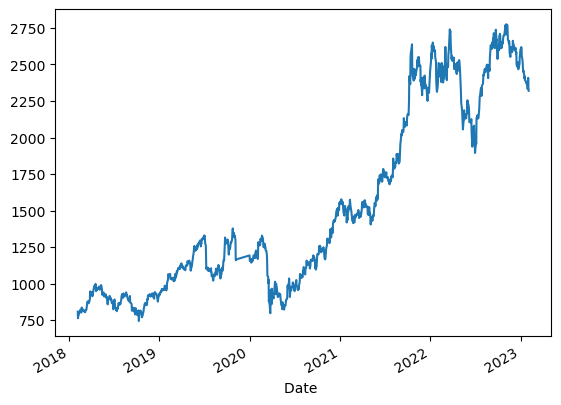

In [19]:
#visualize for understanding the dataset 
db.Open.plot()

<AxesSubplot:xlabel='Date '>

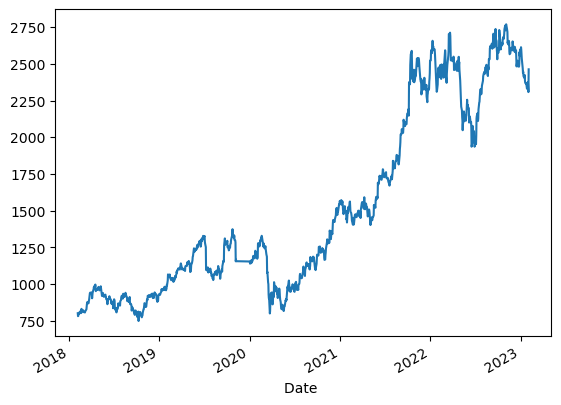

In [20]:
db.Close.plot()

In [21]:
db.describe()

,Open,High,Low,last_traded_price,Close,Vwap,Volume,Value
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03,1.215000e+03
mean,1528.664033,1547.417695,1507.101193,1527.635267,1527.273745,1527.252181,2.318868e+06,3.092927e+09
std,627.645533,633.137310,620.276337,626.320457,626.142945,626.386902,1.794731e+06,2.090076e+09
min,746.000000,787.000000,720.900000,749.000000,749.500000,770.100000,1.815060e+05,2.817199e+08
25%,985.000000,994.875000,966.025000,980.500000,979.725000,979.790000,1.227330e+06,1.912385e+09
50%,1275.200000,1292.550000,1257.650000,1275.000000,1275.000000,1272.700000,1.859258e+06,2.590376e+09
75%,2137.450000,2165.500000,2110.750000,2141.350000,2139.975000,2136.545000,2.829072e+06,3.577893e+09
max,2774.900000,2791.000000,2746.600000,2770.000000,2769.700000,2761.110000,2.214359e+07,2.451345e+10


In [22]:
#creating a new columns for the target 
db['Tomorrow']=db['Close'].shift(-1)
db=db.dropna()


In [23]:
#splitting the data 
X=db.drop(['Tomorrow'],axis=1)
y=db['Tomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False)

In [24]:
X_train.shape

(971, 8)

In [25]:
X_train.head()

,Open,High,Low,last_traded_price,Close,Vwap,Volume,Value
Date,,,,,,,,
2023-02-03,2320.10,2470.00,2320.10,2458.3,2463.10,2425.35,3693638,8.958363e+09
2023-02-02,2341.05,2385.00,2269.60,2325.0,2308.10,2336.44,1788381,4.178441e+09
2023-02-01,2408.55,2409.80,2300.05,2345.0,2345.90,2363.36,1521514,3.595890e+09
2023-01-31,2347.00,2386.45,2335.65,2383.0,2377.15,2367.90,1252600,2.966030e+09
2023-01-30,2332.00,2342.85,2287.05,2340.0,2335.55,2315.79,1401847,3.246381e+09


In [27]:
#training a linear regression model() 
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [28]:
# predict using the X_test data
y_pred=reg.predict(X_test)

In [29]:
# checking the score of model for test data
reg.score(X_test,y_test)

0.9771973193697346

In [30]:
reg.score(X_train,y_train)

0.9993457130611696

In [26]:
#creating folds for cross validation
folds=StratifiedKFold(n_splits=5)

In [31]:
model=cross_val_score(LinearRegression(),X_train,y_train,cv=5)
model.mean()

0.9887826336716767

# Evalution metrics 

In [35]:
# we can clearly see the good fit of the model 
R2=r2_score(y_pred,y_test)
R2

0.9762170705889682

In [36]:
n=y_test.shape[0]
p=7
Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
Adj_r2

0.9755086429043843

In [32]:
# we can see the goodness of the model is clearly good 
mse=mean_squared_error(y_pred,y_test)
mean_squared_error(y_pred,y_test)

75.60556844067095

In [34]:
import math
rmse=math.sqrt(mse)
rmse

8.6951462575779

In [33]:
#after large error penalization of the  model 
mean_absolute_error(y_pred,y_test)

5.835026231543772

# Assumptions of linear regression

In [37]:
errors = y_test-y_pred

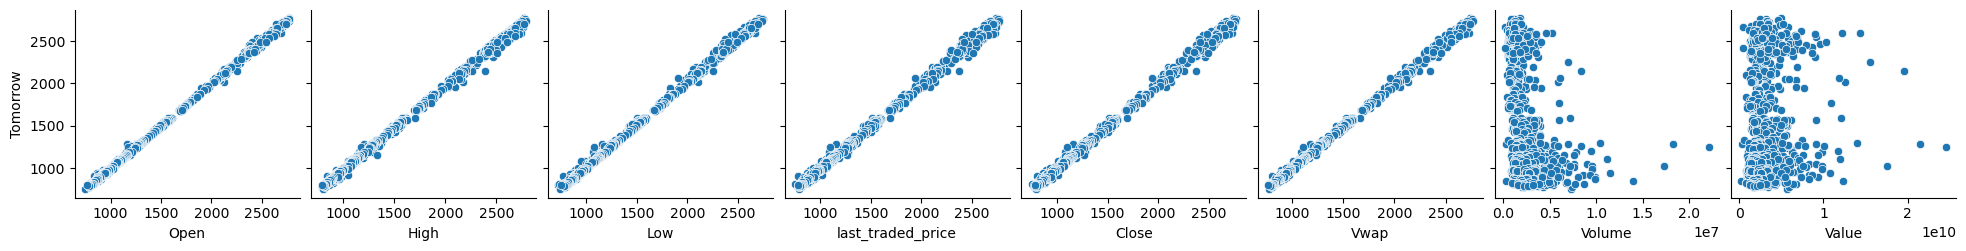

In [38]:
#after seeing the plots  we can understand the linearity of the dataset
sns.pairplot(db,x_vars=['Open','High','Low','last_traded_price','Close','Vwap','Volume','Value'],y_vars=['Tomorrow'])

In [39]:
#the correlation is very high except volume and value 
corr=db.corr()
corr.style.background_gradient(cmap='coolwarm')

,Open,High,Low,last_traded_price,Close,Vwap,Volume,Value,Tomorrow
Open,1.000000,0.999516,0.999528,0.998998,0.999011,0.999447,-0.401387,0.064643,0.999723
High,0.999516,1.000000,0.999444,0.999624,0.999623,0.999819,-0.391827,0.077146,0.999304
Low,0.999528,0.999444,1.000000,0.999530,0.999568,0.999805,-0.407383,0.058027,0.999260
last_traded_price,0.998998,0.999624,0.999530,1.000000,0.999977,0.999819,-0.398811,0.068927,0.998793
Close,0.999011,0.999623,0.999568,0.999977,1.000000,0.999846,-0.399001,0.068357,0.998803
Vwap,0.999447,0.999819,0.999805,0.999819,0.999846,1.000000,-0.399188,0.068283,0.999210
Volume,-0.401387,-0.391827,-0.407383,-0.398811,-0.399001,-0.399188,1.000000,0.830701,-0.400160
Value,0.064643,0.077146,0.058027,0.068927,0.068357,0.068283,0.830701,1.000000,0.064070
Tomorrow,0.999723,0.999304,0.999260,0.998793,0.998803,0.999210,-0.400160,0.064070,1.000000


C:\Users\vasan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


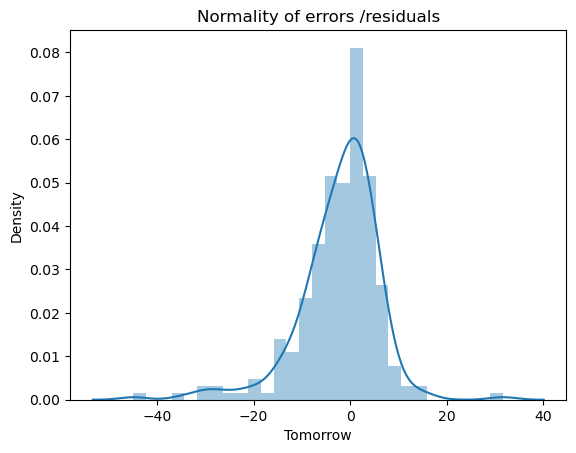

In [40]:
#the distibution of the data is normal distribution 
p=sns.distplot(errors,kde=True)
p=plt.title('Normality of errors /residuals')

# moving average for titan 

In [41]:
#creating moving in time frame of days 5,10,50,100 
horizons=[5,10,50,100]
new_predictors=[]
for horizon in horizons :
    rolling_averages=db.rolling(horizon).mean()
    ratio_column=f"Close_ratio_{horizon}"
    db[ratio_column]=db['Close']/rolling_averages['Close']
    new_predictors +=[ratio_column]


C:\Users\vasan\AppData\Local\Temp\ipykernel_19500\530335140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[ratio_column]=db['Close']/rolling_averages['Close']
C:\Users\vasan\AppData\Local\Temp\ipykernel_19500\530335140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db[ratio_column]=db['Close']/rolling_averages['Close']
C:\Users\vasan\AppData\Local\Temp\ipykernel_19500\530335140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [42]:
db

,Open,High,Low,last_traded_price,Close,Vwap,Volume,Value,Tomorrow,Close_ratio_5,Close_ratio_10,Close_ratio_50,Close_ratio_100
Date,,,,,,,,,,,,,
2023-02-03,2320.10,2470.00,2320.10,2458.30,2463.10,2425.35,3693638,8.958363e+09,2308.10,NaN,NaN,NaN,NaN
2023-02-02,2341.05,2385.00,2269.60,2325.00,2308.10,2336.44,1788381,4.178441e+09,2345.90,NaN,NaN,NaN,NaN
2023-02-01,2408.55,2409.80,2300.05,2345.00,2345.90,2363.36,1521514,3.595890e+09,2377.15,NaN,NaN,NaN,NaN
2023-01-31,2347.00,2386.45,2335.65,2383.00,2377.15,2367.90,1252600,2.966030e+09,2335.55,NaN,NaN,NaN,NaN
2023-01-30,2332.00,2342.85,2287.05,2340.00,2335.55,2315.79,1401847,3.246381e+09,2331.25,0.987147,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,803.00,812.80,796.55,808.00,809.05,806.38,2067452,1.667157e+09,796.80,1.000124,0.992541,0.910843,0.899324
2018-02-09,790.10,804.00,783.05,796.05,796.80,796.06,1564899,1.245747e+09,800.75,0.986725,0.980267,0.900554,0.886031
2018-02-08,785.10,808.90,780.80,800.80,800.75,795.94,2219546,1.766627e+09,783.65,0.992218,0.986759,0.908305,0.890792


In [43]:
db.dropna() # dropping the nan values 

,Open,High,Low,last_traded_price,Close,Vwap,Volume,Value,Tomorrow,Close_ratio_5,Close_ratio_10,Close_ratio_50,Close_ratio_100
Date,,,,,,,,,,,,,
2022-09-13,2680.0,2723.00,2672.00,2703.00,2705.55,2706.85,1536444,4.158926e+09,2661.15,1.017591,1.012931,1.019778,1.049761
2022-09-12,2616.8,2669.70,2610.00,2668.00,2661.15,2645.70,808360,2.138676e+09,2603.45,0.997788,0.996098,1.002658,1.031741
2022-09-09,2652.0,2652.15,2593.00,2600.80,2603.45,2613.56,777186,2.031221e+09,2626.70,0.976765,0.977023,0.980905,1.008216
2022-09-08,2649.0,2659.90,2616.00,2629.00,2626.70,2635.36,754150,1.987456e+09,2637.75,0.987671,0.989868,0.989512,1.016114
2022-09-07,2607.0,2641.40,2600.40,2639.50,2637.75,2628.47,438635,1.152937e+09,2631.65,0.996536,0.995116,0.993193,1.019361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-12,803.0,812.80,796.55,808.00,809.05,806.38,2067452,1.667157e+09,796.80,1.000124,0.992541,0.910843,0.899324
2018-02-09,790.1,804.00,783.05,796.05,796.80,796.06,1564899,1.245747e+09,800.75,0.986725,0.980267,0.900554,0.886031
2018-02-08,785.1,808.90,780.80,800.80,800.75,795.94,2219546,1.766627e+09,783.65,0.992218,0.986759,0.908305,0.890792


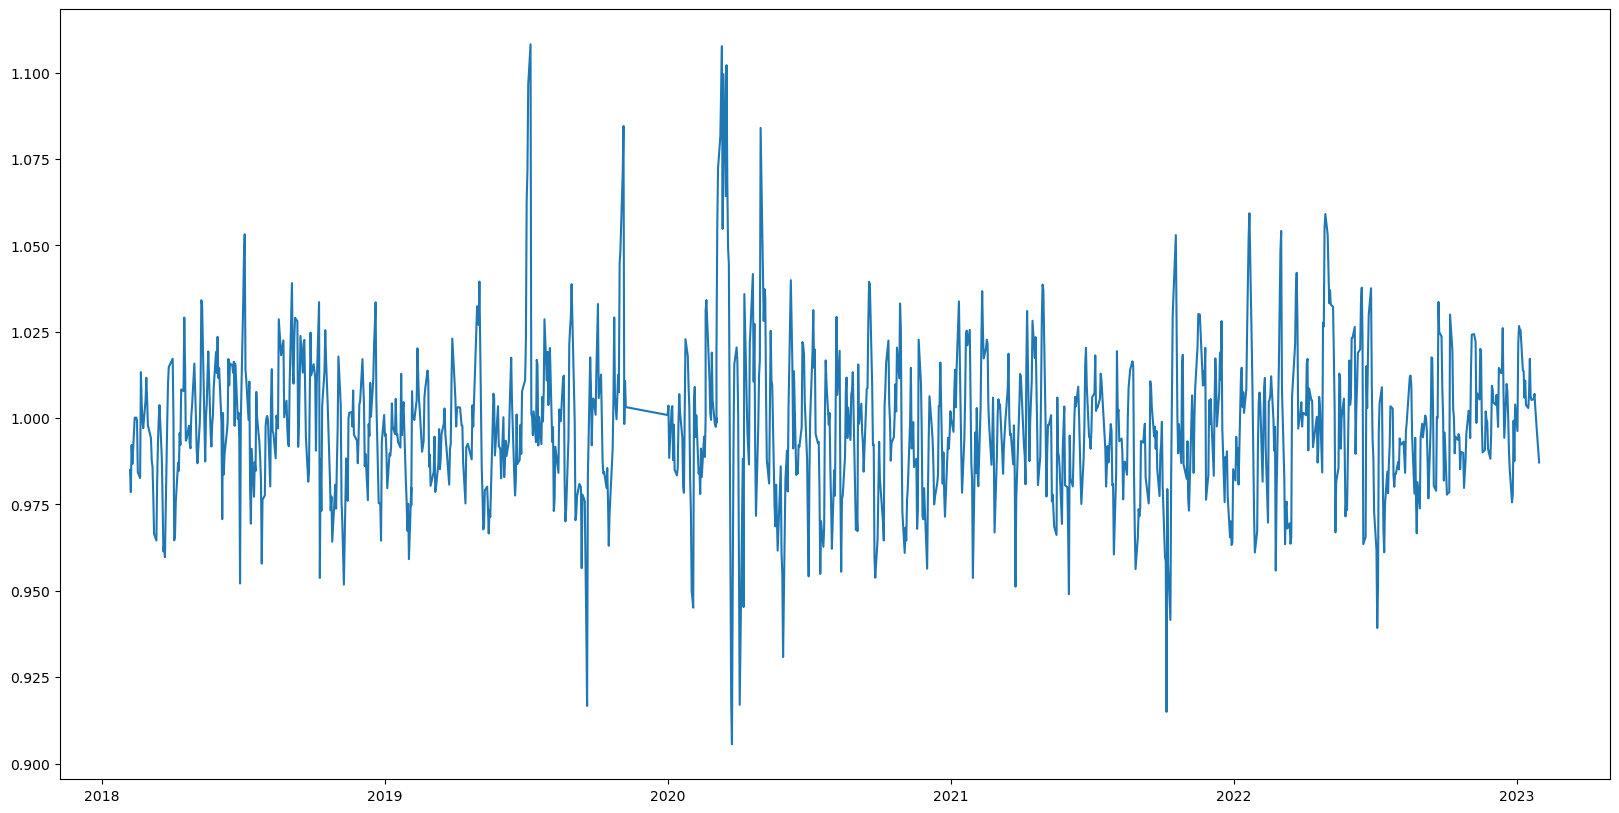

In [51]:
plt.figure(figsize=(20,10))
plt.plot(db.Close_ratio_5) # titan is clearly moving in the past 2 months 

# The model is balanced fit and its performs really good. we can improve the model adding more values to the dataset and handling it in a different way 

# we can  develop the model to make buy and selling signal by improving the model  by backtesting it .This is just a base model for the assignment purpose 

# Thanks rudo for the assignment I enjoyed working and learn a lot from it .hoping for the good response 